In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import time
import tensorflow as tf
#from tensorflow.contrib.data import Dataset, Iterator
#import sklearn.cross_validation as sk
import warnings; warnings.simplefilter('ignore')
import cv2
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import sys
import random
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model,model_from_json
from sklearn.metrics import classification_report, confusion_matrix
from astropy.io import fits
import cv2
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [18]:
import seaborn as sns
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [10]:
from pickle import load

In [11]:
import itertools

In [12]:
modelpath='modelos/VGG16-8020crossval/'

In [13]:
json_file = open(modelpath+'model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights(modelpath+"best_model.h5")
print("Loaded model from disk")


Loaded model from disk


In [14]:
loaded_model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 112, 112, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 112, 112, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 112, 112, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 56, 56, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 56, 56, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 56, 56, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 28, 28, 128)       0  

In [15]:
testX=load( open('testX.pkl', 'rb'))
testY=load( open('testY.pkl', 'rb'))
trainX=load(open('trainX.pkl', 'rb'))
trainy=load(open('trainY.pkl', 'rb'))

In [16]:
def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization


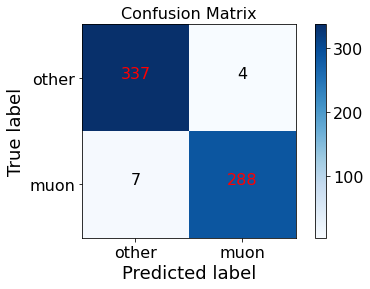

Normalized confusion matrix


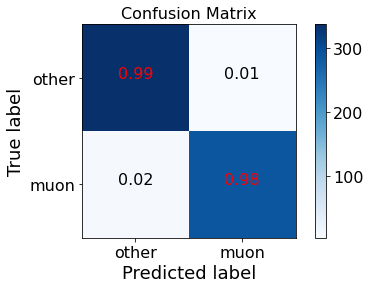

In [21]:
BS = 80
y_pred= loaded_model.predict(testX, batch_size=BS)

cm=confusion_matrix(testY.argmax(axis=1), y_pred.argmax(axis=1))
cm_labels= ['other','muon']
plot_confusion_matrix(cm=cm, classes=cm_labels, title='Confusion Matrix')
plt.savefig(modelpath+'confusionMatrixBestModel.pdf',dpi=300)

plot_confusion_matrix(cm=cm, classes=cm_labels, title='Confusion Matrix', normalize=True)


prob:[0.9949567  0.00504332]
[1. 0.]
True Class other


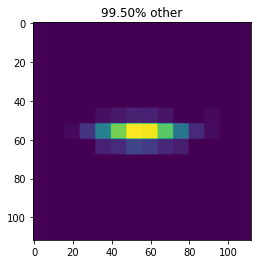

prob:[0.9988588  0.00114114]
[1. 0.]
True Class other


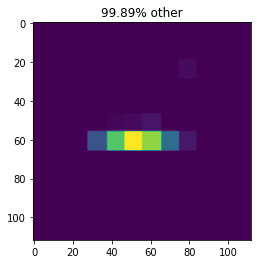

prob:[0.00460763 0.9953923 ]
[0. 1.]
True Class muon


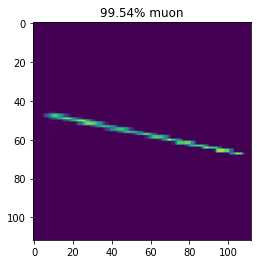

prob:[9.9960548e-01 3.9450455e-04]
[1. 0.]
True Class other


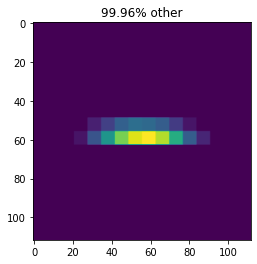

prob:[1.1825645e-04 9.9988174e-01]
[0. 1.]
True Class muon


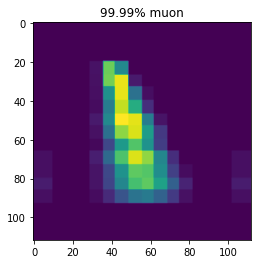

prob:[0.00187834 0.9981217 ]
[0. 1.]
True Class muon


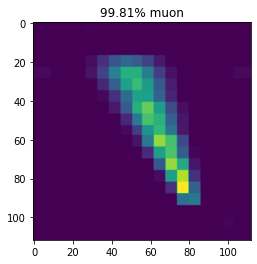

prob:[9.9985516e-01 1.4486170e-04]
[1. 0.]
True Class other


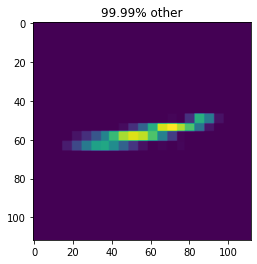

prob:[9.9998784e-01 1.2171764e-05]
[1. 0.]
True Class other


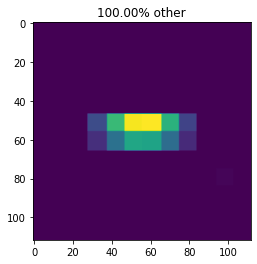

prob:[0.9389827 0.0610173]
[0. 1.]
True Class muon


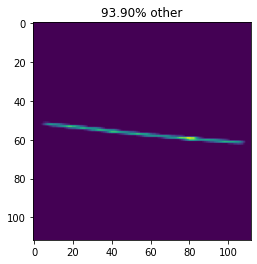

prob:[9.9993968e-01 6.0356742e-05]
[1. 0.]
True Class other


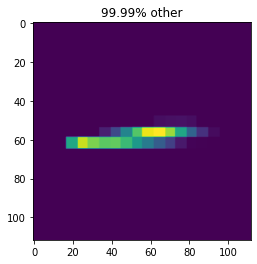

prob:[0.9957054  0.00429461]
[1. 0.]
True Class other


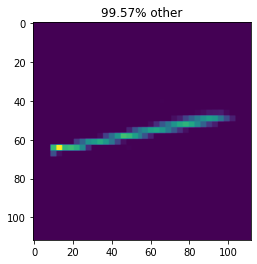

prob:[0.9957675  0.00423251]
[1. 0.]
True Class other


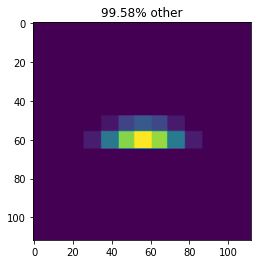

prob:[0.9977786 0.0022214]
[1. 0.]
True Class other


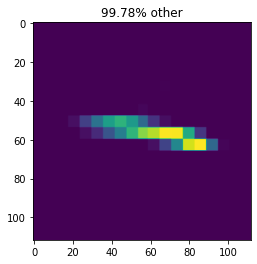

prob:[7.104865e-04 9.992895e-01]
[0. 1.]
True Class muon


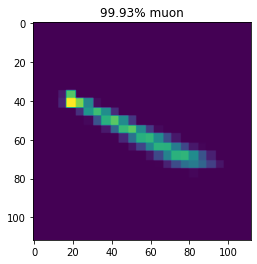

prob:[9.9998927e-01 1.0732057e-05]
[1. 0.]
True Class other


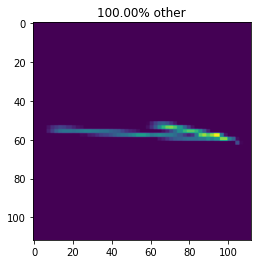

prob:[9.9999785e-01 2.1742053e-06]
[1. 0.]
True Class other


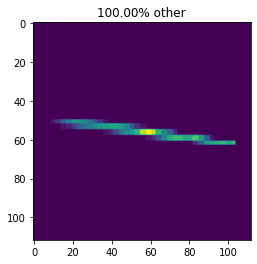

prob:[0.00219801 0.99780196]
[0. 1.]
True Class muon


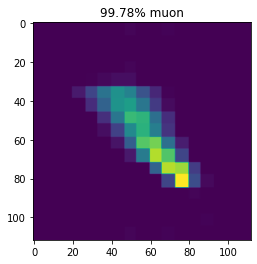

prob:[1.000000e+00 5.616591e-08]
[1. 0.]
True Class other


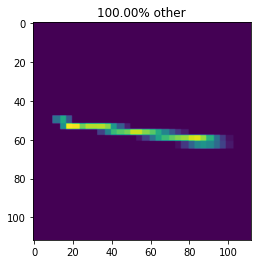

prob:[0.00116234 0.99883765]
[0. 1.]
True Class muon


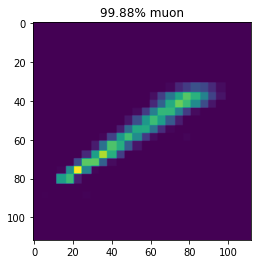

prob:[9.9941993e-01 5.8008236e-04]
[1. 0.]
True Class other


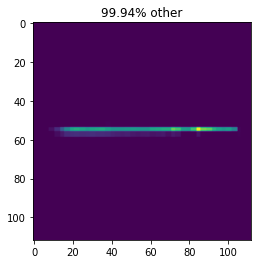

prob:[9.9925405e-01 7.4596569e-04]
[1. 0.]
True Class other


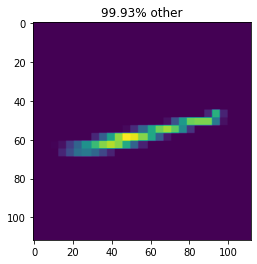

prob:[5.4123433e-05 9.9994588e-01]
[0. 1.]
True Class muon


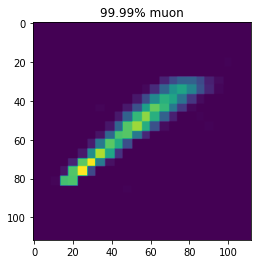

prob:[0.0013935 0.9986065]
[0. 1.]
True Class muon


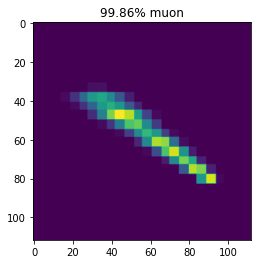

prob:[0.0772781 0.9227219]
[0. 1.]
True Class muon


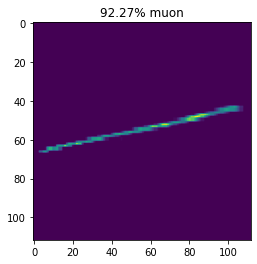

prob:[0.98463446 0.01536557]
[1. 0.]
True Class other


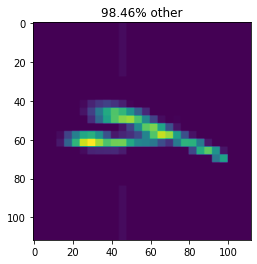

prob:[9.9981004e-01 1.8994784e-04]
[1. 0.]
True Class other


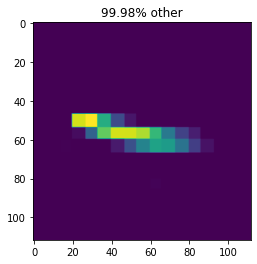

prob:[9.9999964e-01 3.3421151e-07]
[1. 0.]
True Class other


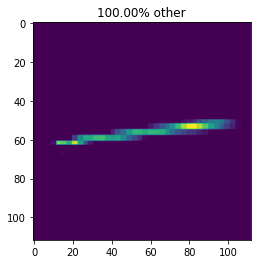

prob:[9.9996269e-01 3.7368973e-05]
[1. 0.]
True Class other


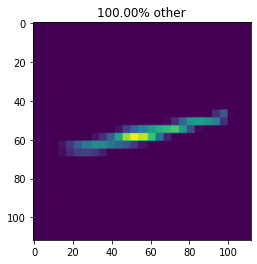

prob:[1.0583237e-04 9.9989414e-01]
[0. 1.]
True Class muon


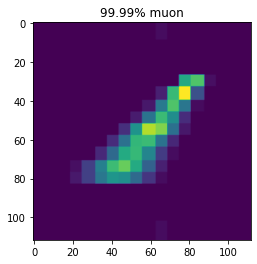

prob:[9.9999547e-01 4.5866041e-06]
[1. 0.]
True Class other


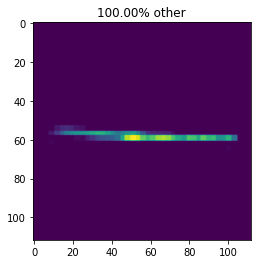

prob:[0.9966568  0.00334318]
[1. 0.]
True Class other


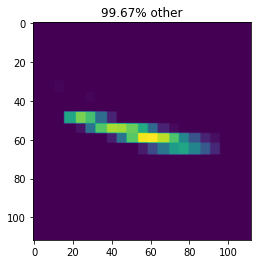

prob:[0.00497165 0.9950283 ]
[0. 1.]
True Class muon


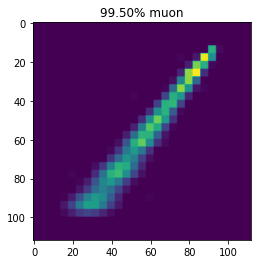

prob:[9.9958915e-01 4.1081366e-04]
[1. 0.]
True Class other


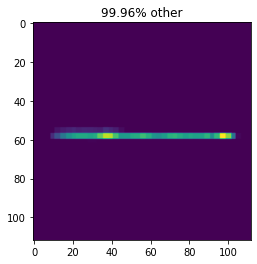

prob:[9.9995947e-01 4.0516374e-05]
[1. 0.]
True Class other


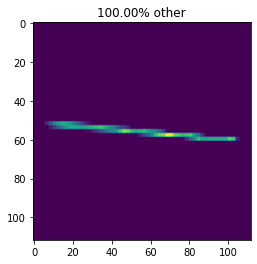

prob:[0.00242503 0.997575  ]
[0. 1.]
True Class muon


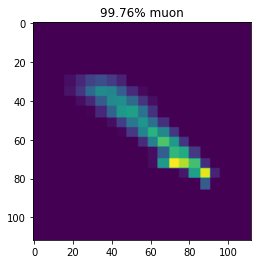

prob:[0.00161692 0.99838305]
[0. 1.]
True Class muon


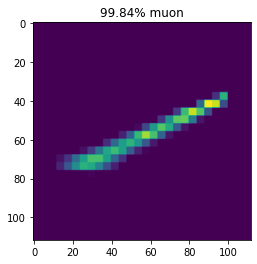

prob:[0.19045705 0.80954295]
[1. 0.]
True Class other


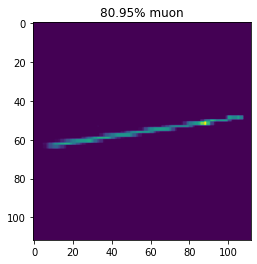

prob:[1.0152541e-04 9.9989843e-01]
[0. 1.]
True Class muon


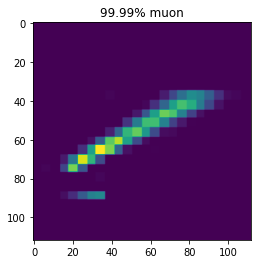

prob:[9.99987125e-01 1.28322945e-05]
[1. 0.]
True Class other


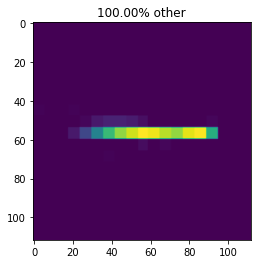

prob:[6.5611576e-04 9.9934381e-01]
[0. 1.]
True Class muon


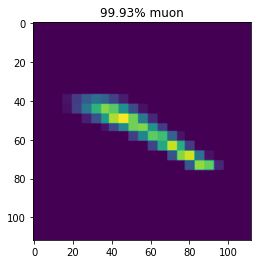

prob:[0.99899656 0.00100345]
[1. 0.]
True Class other


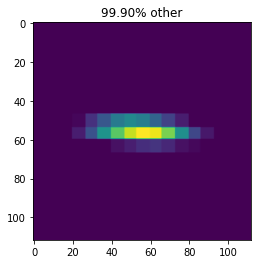

prob:[0.00267328 0.99732673]
[0. 1.]
True Class muon


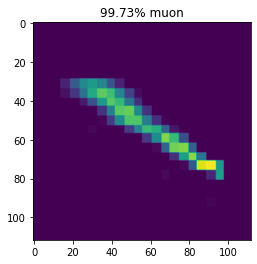

prob:[1.000000e+00 3.048712e-08]
[1. 0.]
True Class other


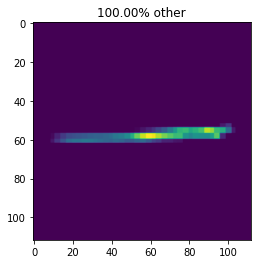

prob:[0.00190006 0.9981    ]
[0. 1.]
True Class muon


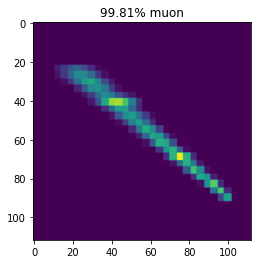

prob:[1.7294564e-04 9.9982709e-01]
[0. 1.]
True Class muon


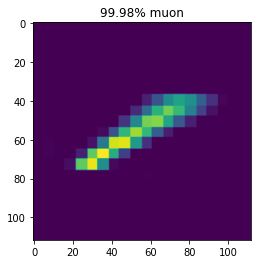

prob:[6.878314e-05 9.999312e-01]
[0. 1.]
True Class muon


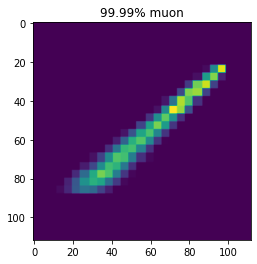

prob:[0.9968917  0.00310832]
[1. 0.]
True Class other


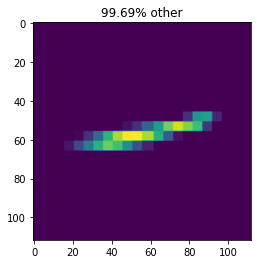

prob:[9.999974e-01 2.673412e-06]
[1. 0.]
True Class other


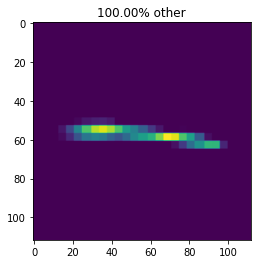

prob:[9.9999762e-01 2.3261327e-06]
[1. 0.]
True Class other


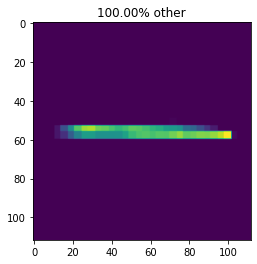

prob:[0.00758402 0.9924159 ]
[0. 1.]
True Class muon


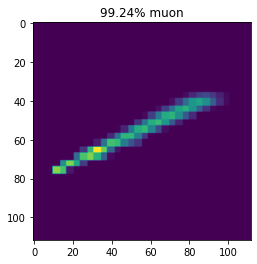

prob:[9.999963e-01 3.697864e-06]
[1. 0.]
True Class other


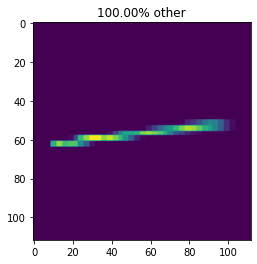

prob:[9.9989688e-01 1.0306652e-04]
[1. 0.]
True Class other


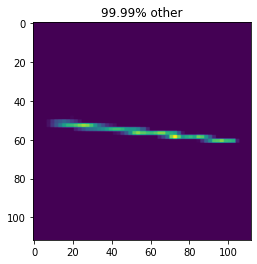

prob:[9.9939251e-01 6.0747116e-04]
[1. 0.]
True Class other


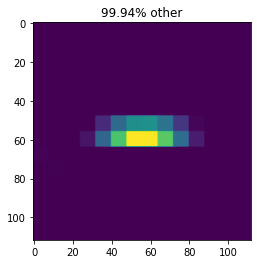

prob:[9.9999237e-01 7.5899557e-06]
[1. 0.]
True Class other


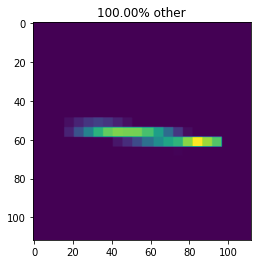

prob:[9.9977368e-01 2.2632278e-04]
[1. 0.]
True Class other


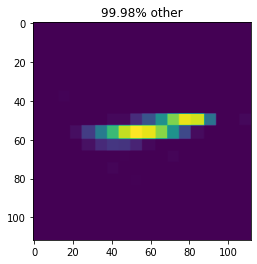

prob:[9.9999881e-01 1.1355105e-06]
[1. 0.]
True Class other


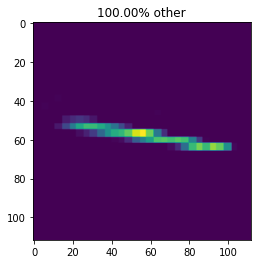

prob:[0.01003996 0.9899601 ]
[0. 1.]
True Class muon


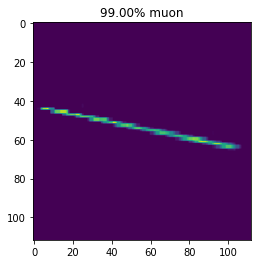

prob:[2.9000574e-05 9.9997103e-01]
[0. 1.]
True Class muon


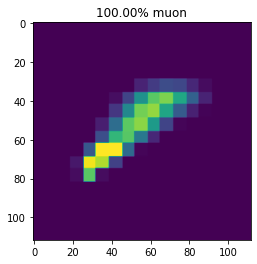

prob:[0.00120272 0.9987973 ]
[0. 1.]
True Class muon


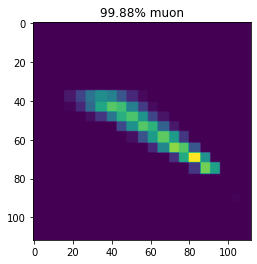

prob:[0.01005235 0.9899476 ]
[0. 1.]
True Class muon


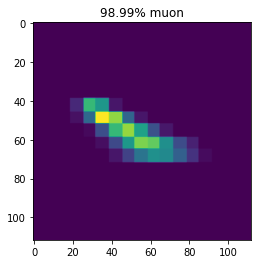

prob:[9.999440e-01 5.607294e-05]
[1. 0.]
True Class other


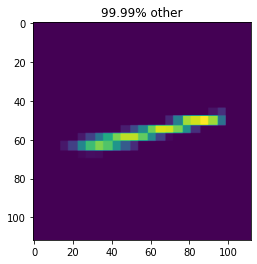

prob:[0.9936686  0.00633136]
[1. 0.]
True Class other


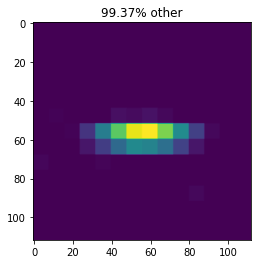

prob:[4.298058e-04 9.995702e-01]
[0. 1.]
True Class muon


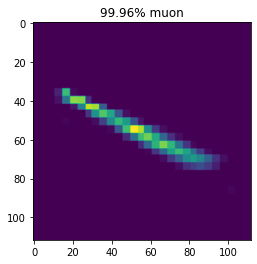

prob:[9.9999917e-01 7.9564620e-07]
[1. 0.]
True Class other


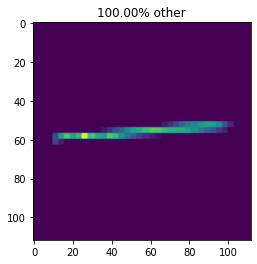

prob:[9.9995816e-01 4.1862288e-05]
[1. 0.]
True Class other


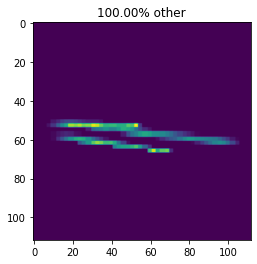

prob:[2.6582598e-04 9.9973410e-01]
[0. 1.]
True Class muon


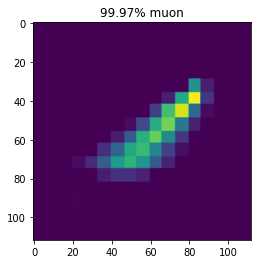

prob:[9.9972540e-01 2.7455334e-04]
[1. 0.]
True Class other


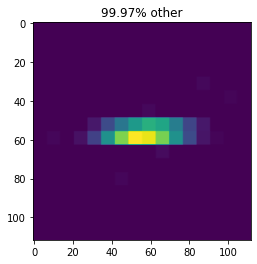

prob:[0.03521672 0.96478325]
[0. 1.]
True Class muon


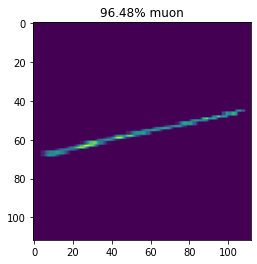

prob:[0.18395741 0.8160426 ]
[0. 1.]
True Class muon


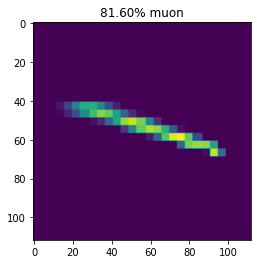

prob:[0.00264283 0.9973572 ]
[0. 1.]
True Class muon


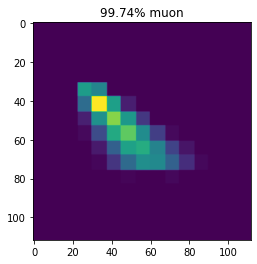

prob:[0.8822558  0.11774425]
[1. 0.]
True Class other


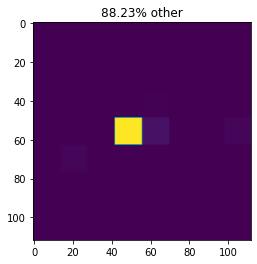

prob:[5.8267196e-05 9.9994171e-01]
[0. 1.]
True Class muon


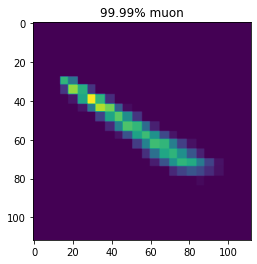

prob:[3.2678897e-06 9.9999678e-01]
[0. 1.]
True Class muon


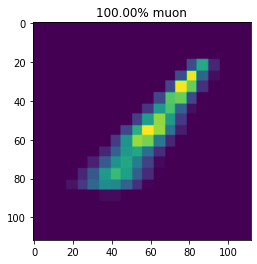

prob:[9.999994e-01 5.476471e-07]
[1. 0.]
True Class other


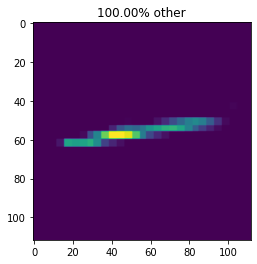

prob:[3.979419e-04 9.996020e-01]
[0. 1.]
True Class muon


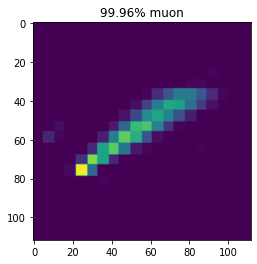

prob:[1.8495148e-04 9.9981505e-01]
[0. 1.]
True Class muon


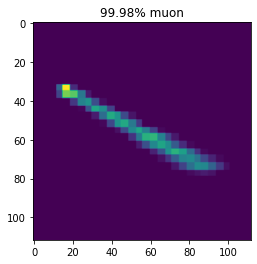

prob:[1.0000000e+00 3.3321086e-08]
[1. 0.]
True Class other


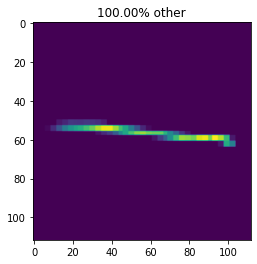

prob:[7.328133e-05 9.999267e-01]
[0. 1.]
True Class muon


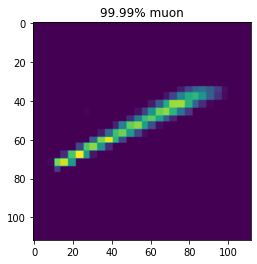

prob:[9.9999988e-01 1.6978356e-07]
[1. 0.]
True Class other


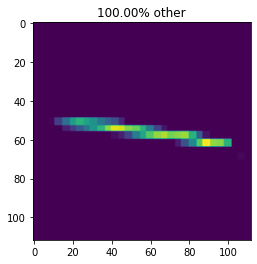

prob:[9.9927384e-01 7.2616525e-04]
[1. 0.]
True Class other


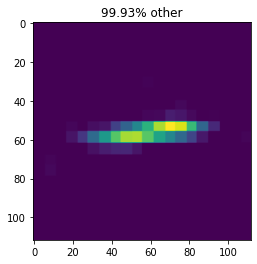

prob:[0.01763518 0.98236483]
[0. 1.]
True Class muon


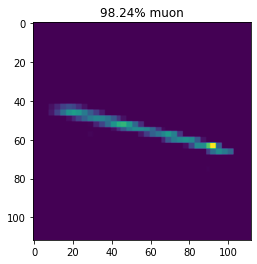

prob:[9.999956e-01 4.365098e-06]
[1. 0.]
True Class other


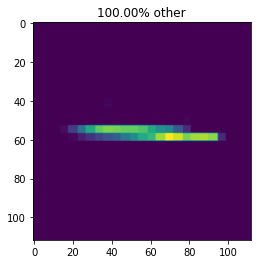

prob:[9.623173e-05 9.999038e-01]
[0. 1.]
True Class muon


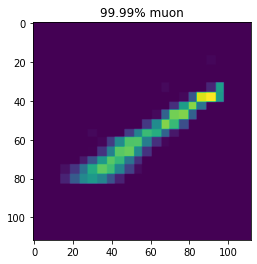

prob:[3.4084645e-04 9.9965918e-01]
[0. 1.]
True Class muon


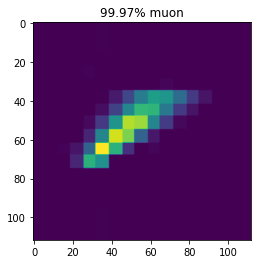

prob:[9.999318e-01 6.813962e-05]
[1. 0.]
True Class other


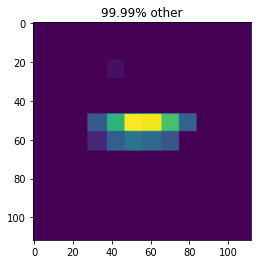

prob:[0.00291263 0.9970874 ]
[0. 1.]
True Class muon


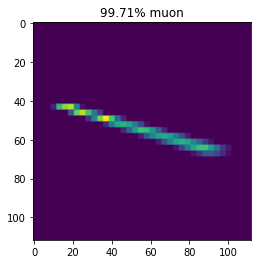

prob:[9.9923229e-01 7.6777337e-04]
[1. 0.]
True Class other


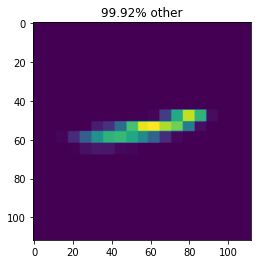

prob:[9.9992442e-01 7.5570584e-05]
[1. 0.]
True Class other


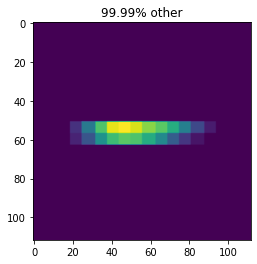

prob:[2.0154708e-04 9.9979848e-01]
[0. 1.]
True Class muon


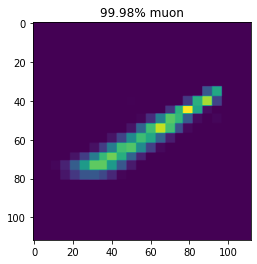

prob:[6.2751543e-04 9.9937254e-01]
[0. 1.]
True Class muon


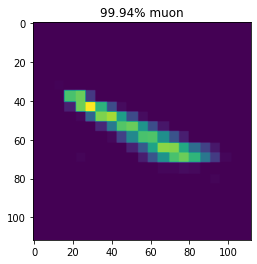

prob:[9.9991226e-01 8.7784145e-05]
[1. 0.]
True Class other


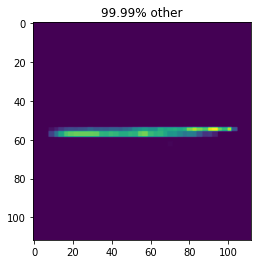

prob:[5.5370491e-04 9.9944633e-01]
[0. 1.]
True Class muon


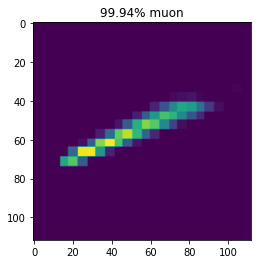

prob:[6.135331e-05 9.999386e-01]
[0. 1.]
True Class muon


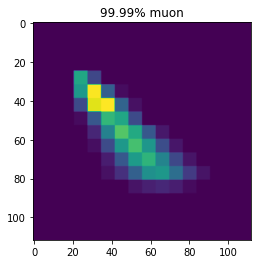

prob:[9.9998951e-01 1.0453042e-05]
[1. 0.]
True Class other


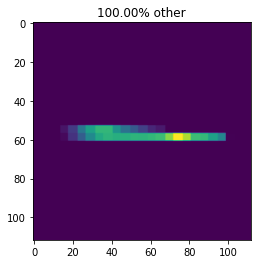

prob:[7.1095856e-04 9.9928904e-01]
[0. 1.]
True Class muon


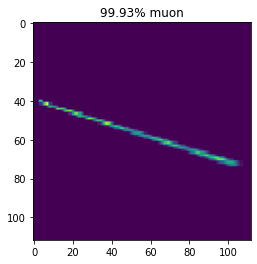

prob:[0.12564324 0.8743567 ]
[0. 1.]
True Class muon


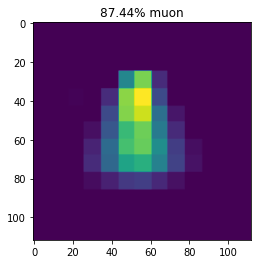

prob:[0.00124855 0.9987514 ]
[0. 1.]
True Class muon


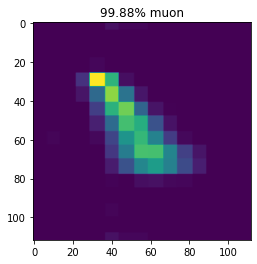

prob:[9.4009345e-05 9.9990594e-01]
[0. 1.]
True Class muon


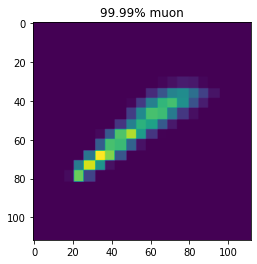

prob:[9.9999976e-01 2.1574574e-07]
[1. 0.]
True Class other


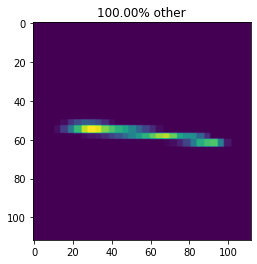

prob:[1.8549039e-05 9.9998140e-01]
[0. 1.]
True Class muon


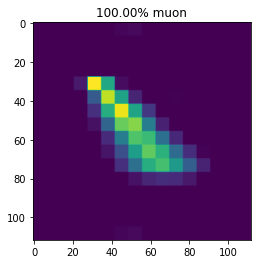

In [10]:
import cv2
import matplotlib.image as mpimg
prediction = y_pred[:100]
for index, probability in enumerate(prediction):
    pixels=testX[index,:,:,1]
    plt.imshow(pixels)
    print("prob:{}".format(probability))
    print(testY[index])
    if testY[index][1] ==1:
        print('True Class muon')
    else:
        print('True Class other')
    if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% muon')
    else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% other')
    plt.show()

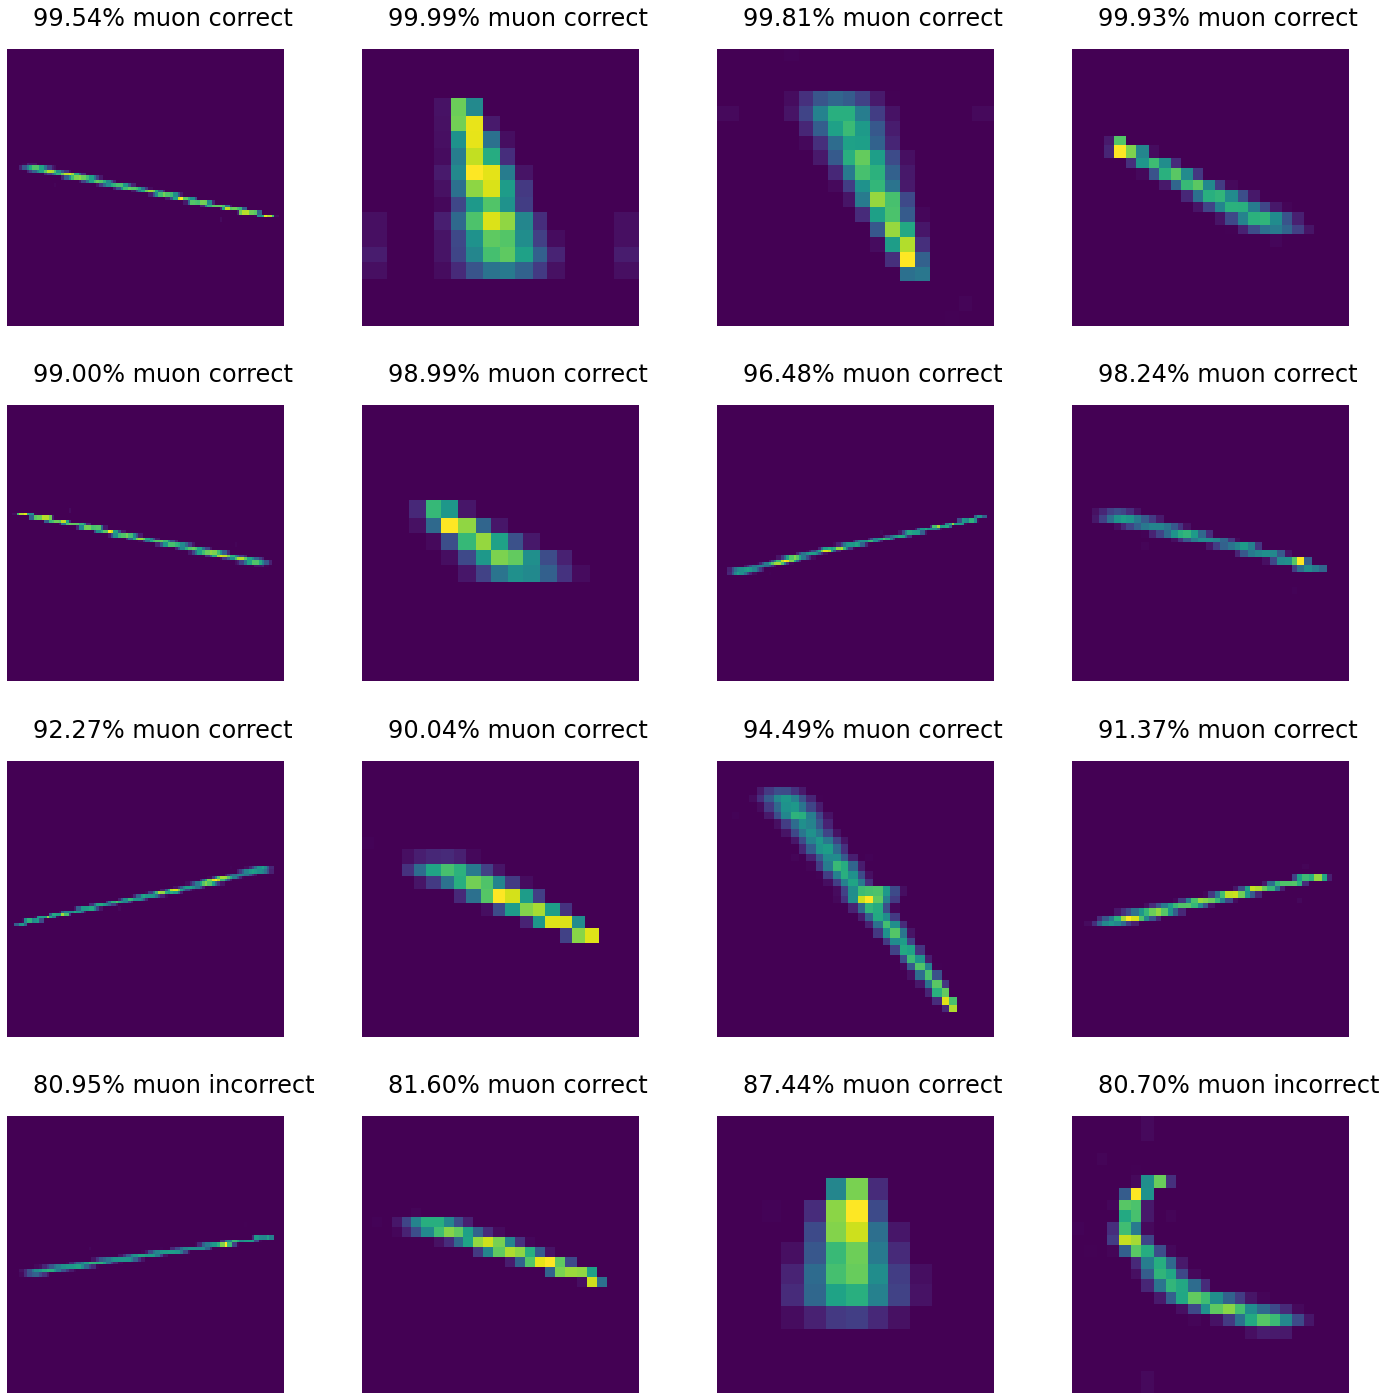

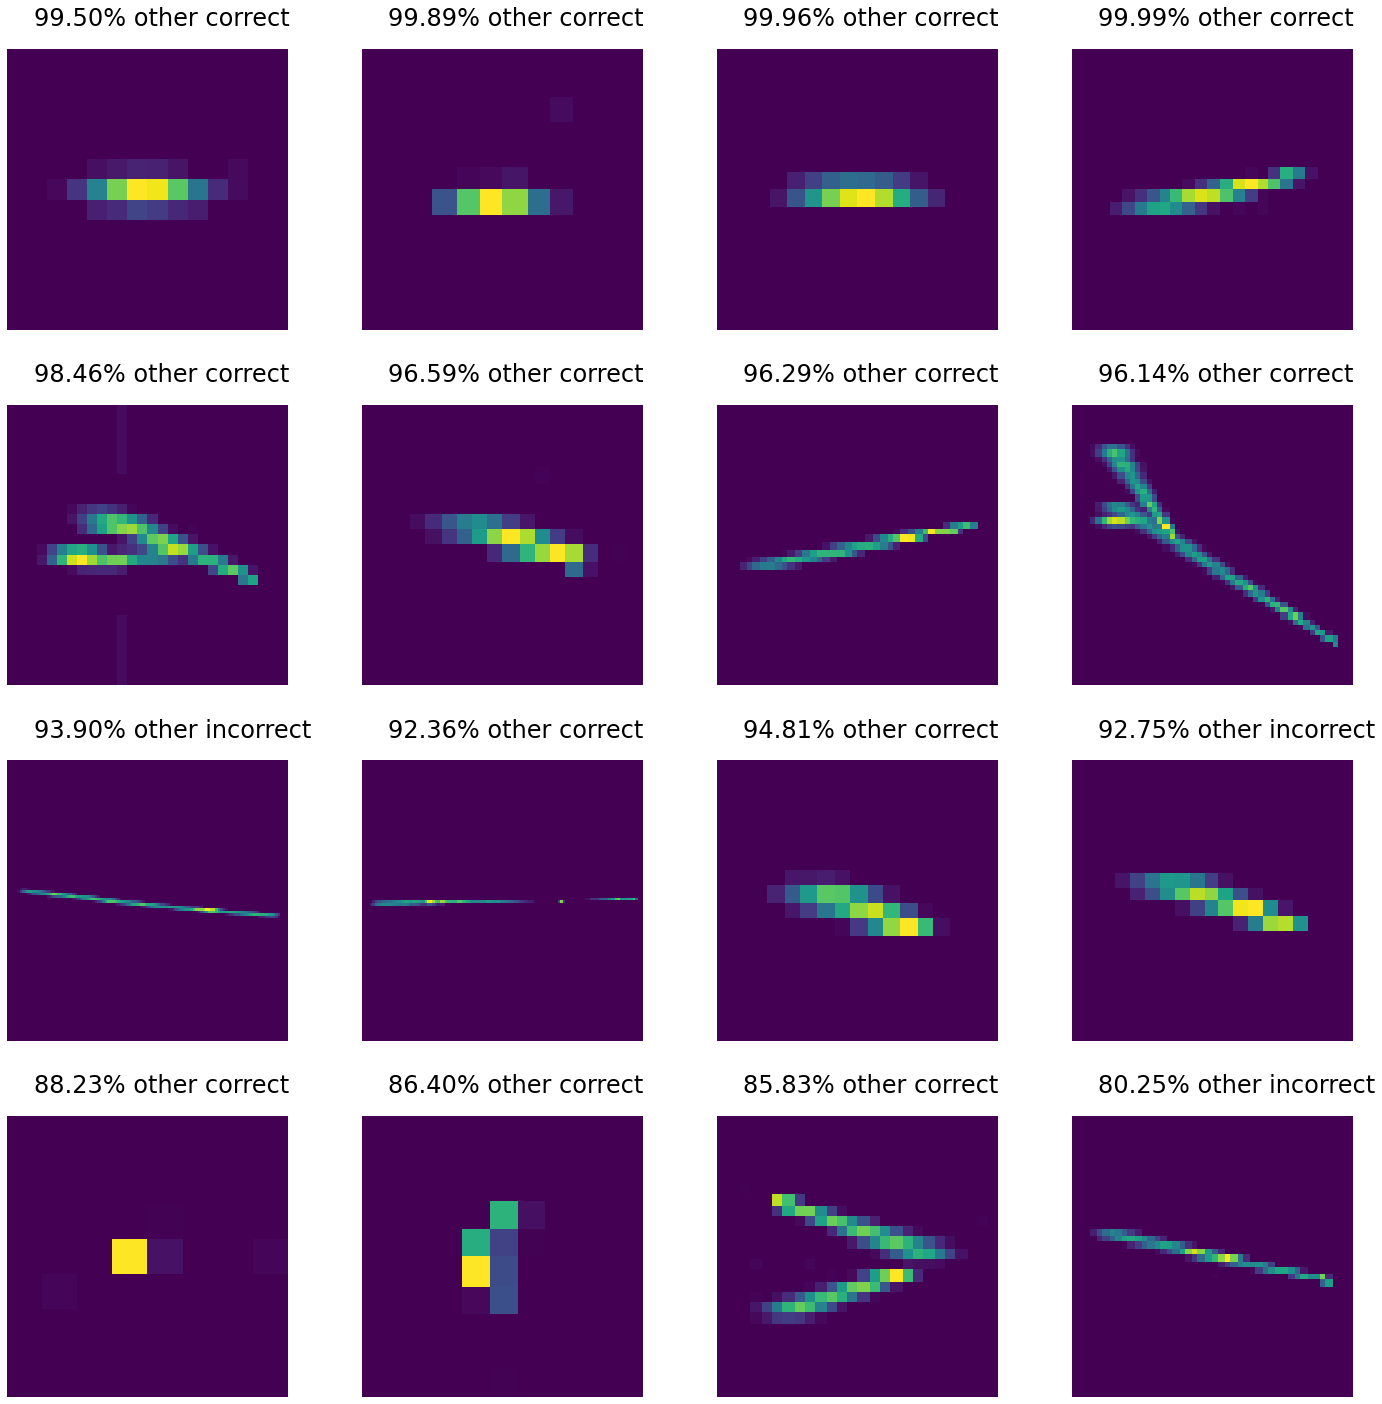

In [24]:
fz=24
window_height = 200
prediction = y_pred
for cl in [0,1]:
    p=np.array([0.99,0.95,0.9,0.8])
    probant=1
    fig=plt.figure(figsize=(20,20))
    plt.subplots_adjust(wspace=None, hspace=None)
    i=0 
    for prob in p:
        i=i+1
        j=0    
        for index, probability in enumerate(prediction):
            if(np.abs(cl-probability[1])>prob and np.abs(cl-probability[1])<probant  and j<4):
                j=j+1
                pixels=testX[index,:,:,1]
                trueC=testY.argmax(axis=1)[index]
                if probability[1] > prob:
                    text='%.2f' % (probability[1]*100)  + '% muon'
                else:
                    text='%.2f' %((1-probability[1])*100) + '% other'
                if trueC== (probability[1] > prob):
                    text=text+ ' correct'
                else:
                    text=text + ' incorrect'

                plt.subplot(4,4, j+(i-1)*4)
                plt.imshow(pixels,interpolation='nearest')
                plt.text(10, -10,text, fontsize=fz)
                plt.axis('off')
        probant=prob
    plt.tight_layout()
    plt.savefig(modelpath+'testSamples.pdf',dpi=300)
    #plt.close(fig)
    
    plt.show()           

In [154]:
fz=24
window_height = 200
prediction = y_pred
fig=plt.figure(figsize=(30,20))
plt.subplots_adjust(wspace=None, hspace=None)
i=0
p=np.array([0.99,0.90,0.8])
j=0
for case in [False,True]:
    for cl in [0,1]:
        probant=1
        
        for prob in p:
            i=i+1
            k=0  
            for index, probability in enumerate(prediction):
                trueC=testY.argmax(axis=1)[index]
                
                if(case):
                    prob=prob
                    cond=np.abs(cl-probability[1])>prob
                    cond=cond and np.abs(cl-probability[1])<probant
                    cond=cond and not(trueC== (probability[1] > prob))
                else:
                    cond=np.abs(cl-probability[1])>prob 
                    cond=cond and np.abs(cl-probability[1])<probant
                    cond=cond and (trueC== (probability[1] > prob))
                cond=cond and k<2
                if(cond):
                    j=j+1
                    k=k+1
                    pixels=testX[index,:,:,1]
                    if probability[1] > 0.5:
                        text='%.2f' % (probability[1]*100)  + '% muon'
                    else:
                        text='%.2f' %((1-probability[1])*100) + '% other'
                    if trueC== (probability[1] > prob):
                        text=text+ ' correct'
                    else:
                        text=text + ' incorrect'
                    plt.subplot(4,6, j)
                    plt.imshow(pixels,interpolation='nearest')
                    plt.text(10, -10,text, fontsize=fz)
                    plt.axis('off')
            probant=prob
plt.tight_layout()
plt.savefig(modelpath+'testSamples.pdf',dpi=300)
plt.close(fig)

plt.show() 

In [91]:
plt.close(fig)


In [25]:

fig = plt.figure(figsize=(8,8))

sns.set(font_scale=1.5)

ax = sns.distplot( prediction[:,1],kde=False)
total = len(prediction)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()*0.1
        y = p.get_y() + p.get_height()*0.5
        ax.annotate(percentage, (x, y))
       # y = p.get_y() + p.get_height()*0.9
       # ax.annotate(p.get_height(), (x, y))
plt.xticks(rotation='70')
plt.xlabel("Probability Test Sample")
plt.ylabel("Events")
plt.savefig(modelpath+'Probability.pdf',dpi=300)
plt.close(fig)


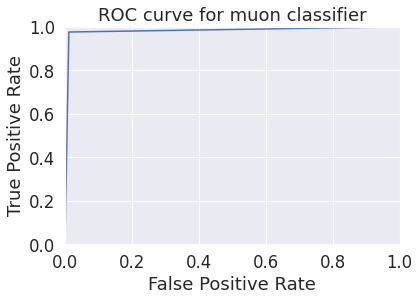

In [27]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(testY.argmax(axis=1), y_pred.argmax(axis=1))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for muon classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.savefig(modelpath+'Roc.pdf',dpi=300)


In [28]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

In [29]:
Path='/home/gpu/Documentos/CONNIEData/eventsFits/'


In [16]:
nimg=32
columns =8
fz=16
h=20
w=10
window_height = 200
true_class=[0,1]
predicted_class=[0,1]
for true_c in true_class:
    
    for pred_c in predicted_class:
        flag_true=testY.argmax(axis=1)==true_c
        flag_pred=y_pred.argmax(axis=1)==pred_c
        flag=np.logical_and( flag_true, flag_pred)
        n=sum(flag)
        data= testX[flag,:,:,1]
        
        true= testY.argmax(axis=1)[flag]
        pred= y_pred.argmax(axis=1)[flag]

        
        if(n<10):
            nimg=n
            columns=2
            fz=18
        
        if(n>100):
            nimg=50
            columns=10
            fz=12
        if(n>200):
            nimg=200
            columns=20
            fz=8
            h=40
            w=20

        fig=plt.figure(figsize=(h,w))
        for i in range(0,n):
            plt.subplot(n / columns + 1, columns, i + 1)
            img=data[i,:,:]
            aspect_ratio = float(img.shape[1])/float(img.shape[0])
            window_width = window_height/aspect_ratio
            res = cv2.resize(img, dsize=(int(window_height),int(window_width)), interpolation=cv2.INTER_AREA)
            plt.imshow(res,cmap='hot_r')
            plt.text(10, -20,'true '+str(true[i])+' pred '+str(pred[i]), fontsize=fz)
            plt.axis('off')
            #fig.axes.get_xaxis().set_visible(False)
            #fig.axes.get_yaxis().set_visible(False)
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.savefig(modelpath+'/true'+str(true_c)+'pred'+str(pred_c)+'.png')
        plt.close(fig)
            #plt.show()
            #break
            

In [18]:
inp = loaded_model.input                                           # input placeholder
outputs = [layer.output for layer in loaded_model.layers]
for out in outputs
    functors = [K.function([inp]+ [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

NameError: name 'K' is not defined